<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Dhruv/SBT_Graphs_Dhruv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CP-01 Data Alchemists
# Seoul Bike Trip

> Visualizing Data Using Plots

Loading Dataset from Google Drive

In [13]:
! gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/CP01.zip
100% 630M/630M [00:06<00:00, 90.4MB/s]


In [12]:
!unzip /content/CP01.zip

Archive:  /content/CP01.zip
replace For_modeling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Data Visualization

> Importing Libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

> Storing the Dataset in a dataframe

In [15]:
df = pd.read_csv("/content/For_modeling.csv",
                  dtype={
                      'Duration': 'int8',
                      'Distance': 'int8',
                      'PLong': 'float32',
                      'PLatd': 'float32',
                      'DLong': 'float32',
                      'Haversine':'float32',
                      'Pmonth':'int8',
                      'Pday':'int8',
                      'Phour':'int8',
                      'Pmin':'int8',
                      'PDweek':'int8',
                      'Dmonth':'int8',
                      'Dday':'int8',
                      'Dhour':'int8',
                      'Dmin':'int8',
                      'DDweek':'int8',
                      'Temp':'float32',
                      'Precip':'float32',
                      'Wind':'float32',
                      'Solar':'float32',
                      'Snow':'float32',
                      'GroundTemp':'float32',
                      'Dust':'float32'
                  },index_col=0

                  ).sample(frac=1)
df = df.reset_index().drop(columns=['index'])
df.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,47,118,37.566612,126.977470,37.566612,126.977470,0.000000,3,22,17,...,49,3,9.600000,0.0,3.2,38.0,1.35,0.0,12.700000,47.0
1,24,88,37.482159,127.002701,37.509380,126.963615,4.588263,11,15,10,...,48,3,8.600000,0.0,0.6,57.0,0.77,0.0,11.100000,44.0
2,20,-30,37.470440,127.038857,37.463322,127.036041,0.829589,11,20,9,...,50,1,2.300000,0.0,1.2,43.0,0.52,0.0,-0.100000,31.0
3,27,-94,37.546307,127.049805,37.524071,127.021790,3.495065,10,24,12,...,40,2,16.799999,0.0,1.6,48.0,2.10,0.0,20.799999,75.0
4,27,102,37.513126,127.100960,37.541805,127.124718,3.815610,5,31,22,...,1,3,21.100000,0.0,2.1,59.0,0.00,0.0,19.400000,23.0


> Getting Information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


In [ ]:
numeric_stats = df.describe()

# Summary of the statistics
print(numeric_stats)

           Duration      Distance         PLong         PLatd         DLong  \
count  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06   
mean   2.580294e+01  3.713519e+03  3.754761e+01  1.269908e+02  3.754770e+01   
std    2.504333e+01  3.956611e+03  4.441376e-02  8.257065e-02  4.445305e-02   
min    1.000000e+00  1.000000e+00  3.743727e+01  1.267986e+02  3.743727e+01   
25%    8.000000e+00  1.230000e+03  3.751424e+01  1.269200e+02  3.751424e+01   
50%    1.600000e+01  2.280000e+03  3.754693e+01  1.269943e+02  3.754655e+01   
75%    3.600000e+01  4.620000e+03  3.757324e+01  1.270618e+02  3.757324e+01   
max    1.190000e+02  3.329000e+04  3.768972e+01  1.271803e+02  3.768972e+01   

              DLatd     Haversine        Pmonth          Pday         Phour  \
count  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06  9.601139e+06   
mean   1.269907e+02  1.870315e+00  7.578754e+00  1.576714e+01  1.437801e+01   
std    8.323726e-02  1.995361e+00  2.696797e+00  8.

In [18]:
data_with_zero_displacement = df[df['Haversine']==0]
data_with_zero_displacement.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,47,118,37.566612,126.977470,37.566612,126.977470,0.0,3,22,17,...,49,3,9.600000,0.0,3.2,38.0,1.35,0.0,12.7,47.0
39,48,-110,37.512959,126.952072,37.512959,126.952072,0.0,8,14,21,...,30,1,31.299999,0.0,0.3,59.0,0.00,0.0,30.0,15.0
45,63,-54,37.639278,127.026756,37.639278,127.026756,0.0,6,3,20,...,9,6,25.299999,0.0,2.2,32.0,0.06,0.0,22.0,15.0
46,15,6,37.582245,126.950645,37.582245,126.950645,0.0,9,21,19,...,38,4,20.299999,0.0,1.0,81.0,0.02,0.0,20.0,7.0
55,10,10,37.599491,126.916862,37.599491,126.916862,0.0,8,18,22,...,14,5,26.299999,0.0,0.8,48.0,0.00,0.0,26.0,23.0


In [19]:
data_with_zero_displacement.shape

(955083, 25)

In [20]:
# Check if pickup and dropoff coordinates are the same
same_coordinates_mask = np.logical_and(df['PLong'] == df['DLong'], df['PLatd'] == df['DLatd'])

# Filter the data based on both conditions
filtered_data = df[~(same_coordinates_mask & (df['Haversine'] == 0))]

In [21]:
# removing the tuples for which haversine == 0
filtered_data = df[df['Haversine'] != 0]

# Plotting the Dataset

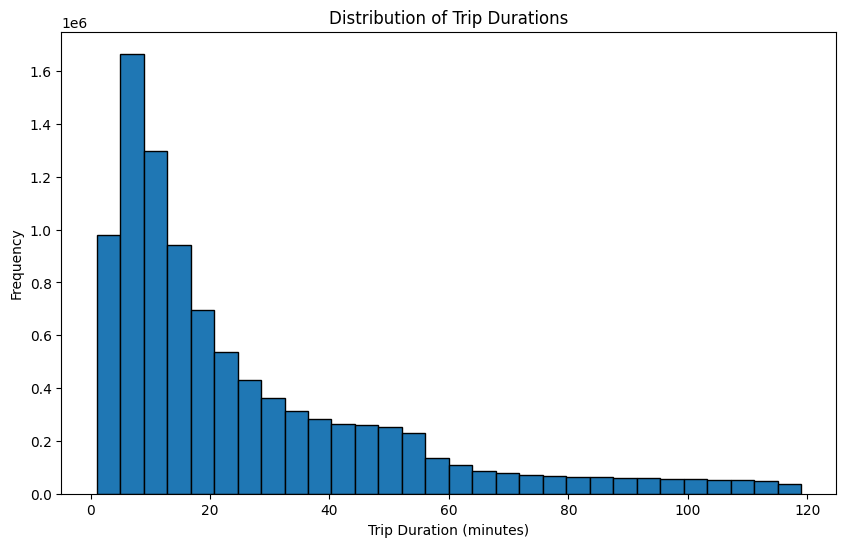

In [ ]:
# Histogram of trip duration
plt.figure(figsize=(10, 6))
plt.hist(df['Duration'], bins=30, edgecolor='k')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.show()


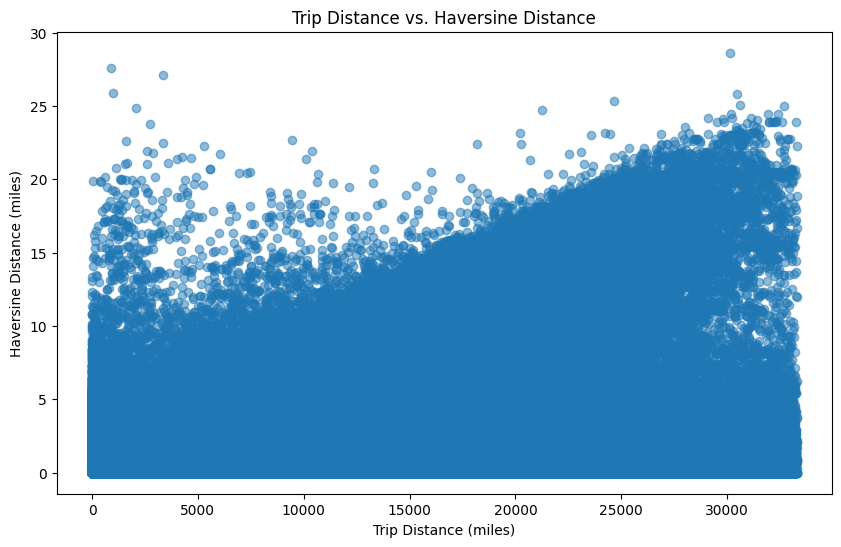

In [ ]:
# Scatter plot of trip distance vs. haversine distance
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Haversine'], alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Haversine Distance (miles)')
plt.title('Trip Distance vs. Haversine Distance')
plt.show()


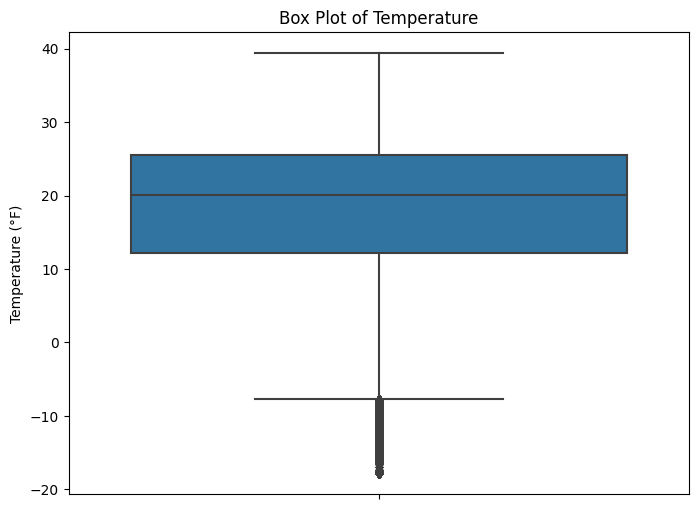

In [ ]:
# Box plot of temperature
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Temp')
plt.ylabel('Temperature (°F)')
plt.title('Box Plot of Temperature')
plt.show()


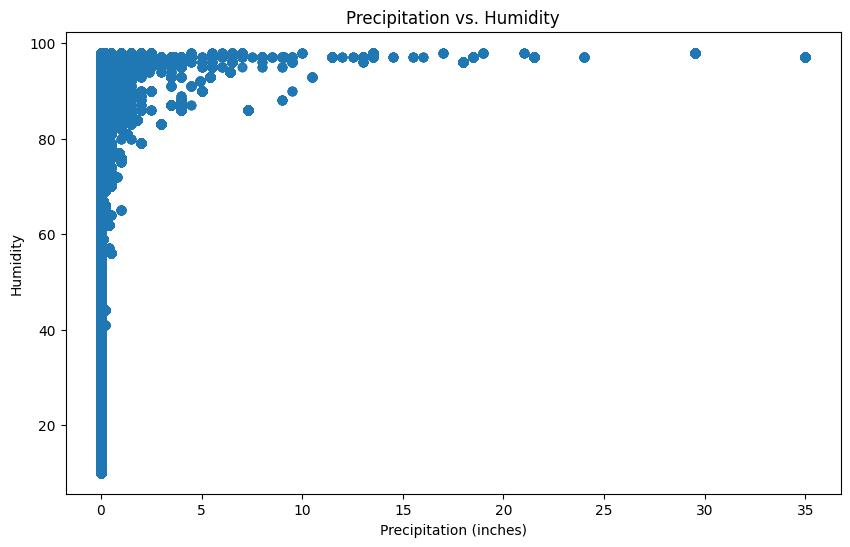

In [ ]:
# Scatter plot of precipitation vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(df['Precip'], df['Humid'], alpha=0.5)
plt.xlabel('Precipitation (inches)')
plt.ylabel('Humidity')
plt.title('Precipitation vs. Humidity')
plt.show()


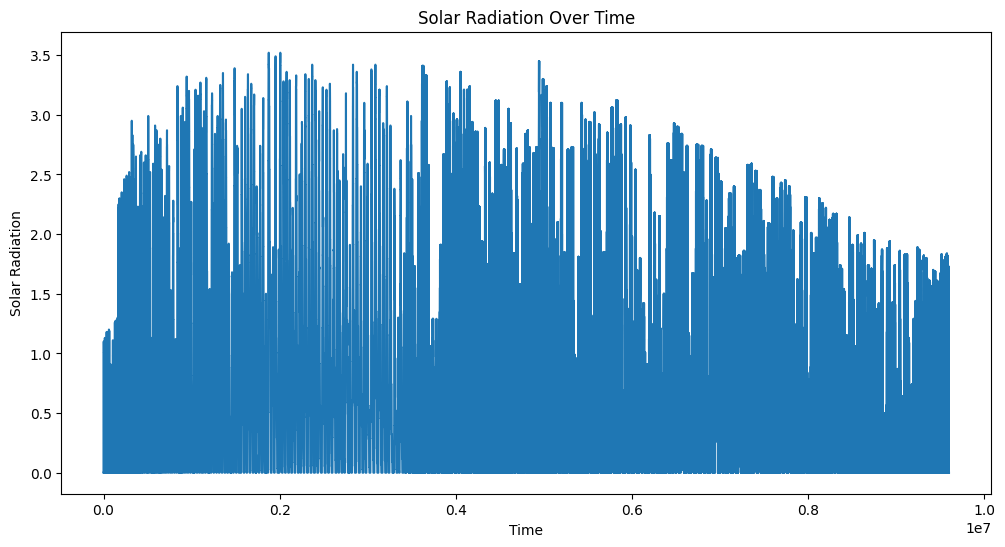

In [ ]:
# Line plot of solar radiation over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Solar'])
plt.xlabel('Time')
plt.ylabel('Solar Radiation')
plt.title('Solar Radiation Over Time')
plt.show()


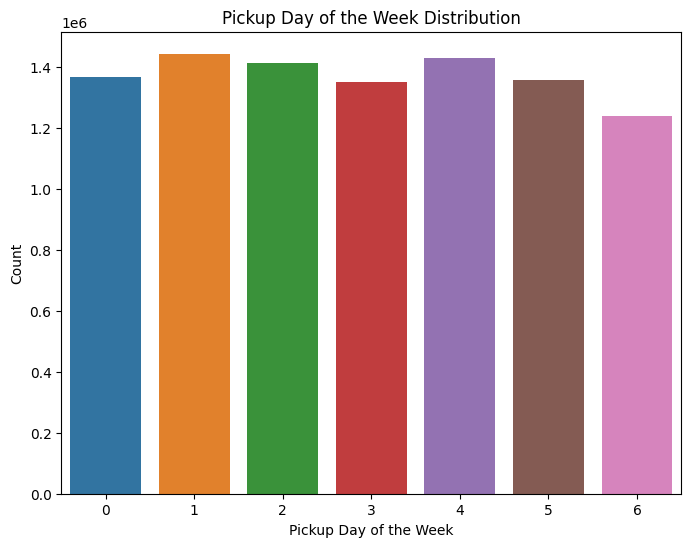

In [ ]:
# Bar plot of pickup day of the week counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PDweek')
plt.xlabel('Pickup Day of the Week')
plt.ylabel('Count')
plt.title('Pickup Day of the Week Distribution')
plt.show()



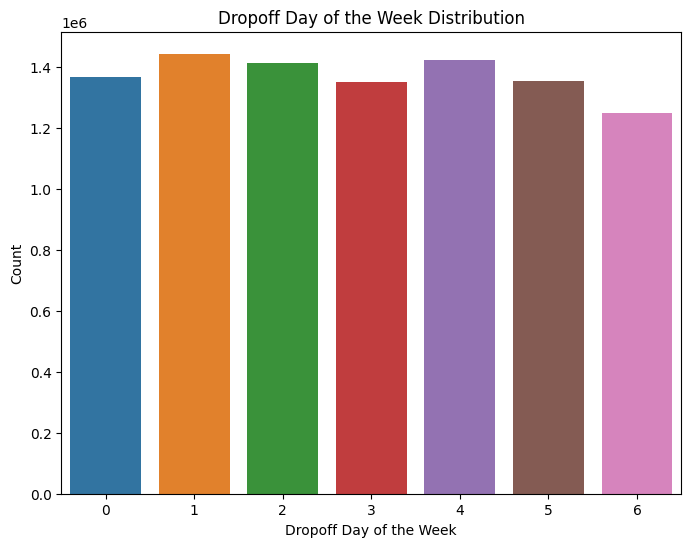

In [ ]:
# Bar plot of dropoff day of the week counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='DDweek')
plt.xlabel('Dropoff Day of the Week')
plt.ylabel('Count')
plt.title('Dropoff Day of the Week Distribution')
plt.show()

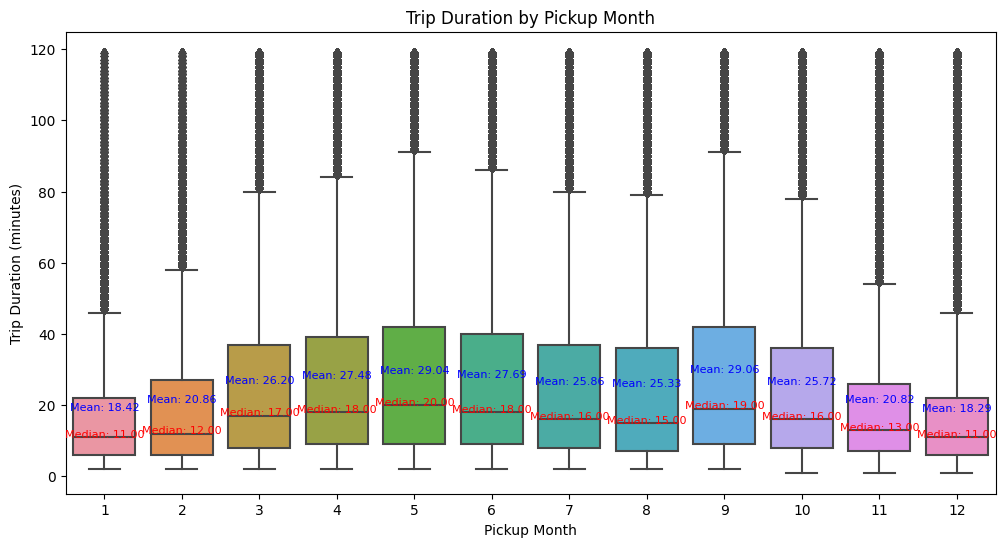

In [ ]:
# Box plot of trip duration by month
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='Pmonth', y='Duration')
plt.xlabel('Pickup Month')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration by Pickup Month')

for i, month in enumerate(sorted(df['Pmonth'].unique())):
    subset = df[df['Pmonth'] == month]
    mean = subset['Duration'].mean()
    median = subset['Duration'].median()

    ax.text(i, mean, f'Mean: {mean:.2f}', ha='center', fontsize=8, color='b')
    ax.text(i, median, f'Median: {median:.2f}', ha='center', fontsize=8, color='r')

plt.xticks(range(len(sorted(df['Pmonth'].unique()))), sorted(df['Pmonth'].unique()))
plt.show()

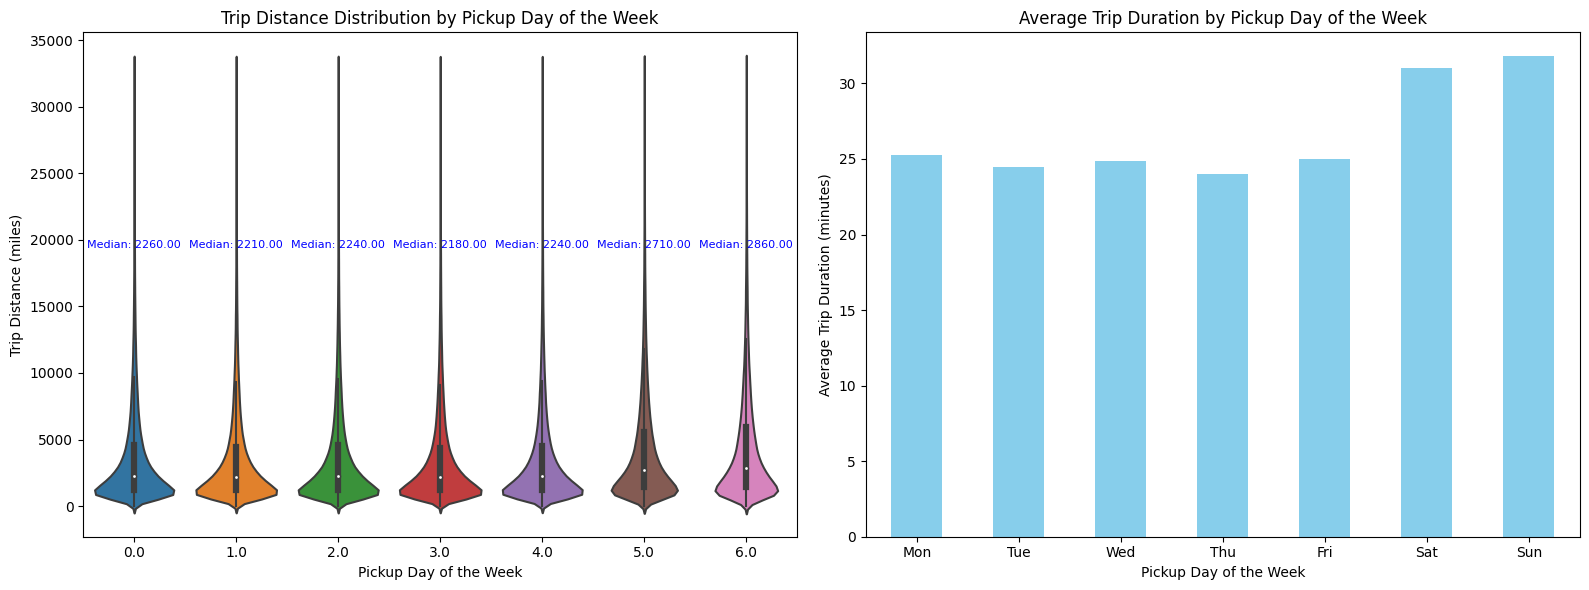

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Violin plot of trip distance by day of the week
sns.violinplot(data=df, x='PDweek', y='Distance', ax=axes[0])
axes[0].set_xlabel('Pickup Day of the Week')
axes[0].set_ylabel('Trip Distance (miles)')
axes[0].set_title('Trip Distance Distribution by Pickup Day of the Week')

medians = df.groupby('PDweek')['Distance'].median()
for i, median in enumerate(medians):
    axes[0].text(i, 20000, f'Median: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

# Grouped bar plot for average trip duration by pickup day of the week
avg_duration_by_day = df.groupby('PDweek')['Duration'].mean()
avg_duration_by_day.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_xlabel('Pickup Day of the Week')
axes[1].set_ylabel('Average Trip Duration (minutes)')
axes[1].set_title('Average Trip Duration by Pickup Day of the Week')
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.tight_layout()
plt.show()


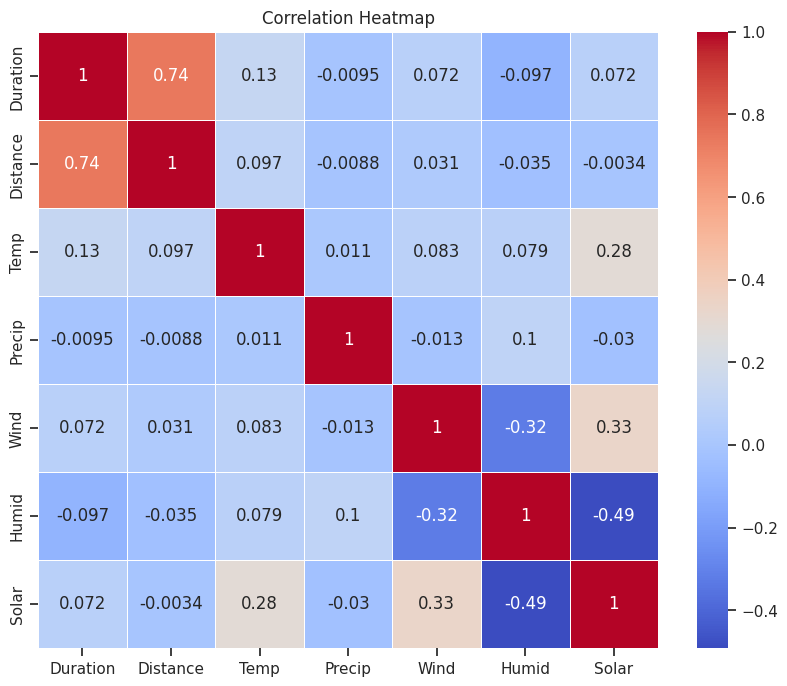

In [ ]:
# Heatmap for correlation matrix
correlation_matrix = df[['Duration', 'Distance', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


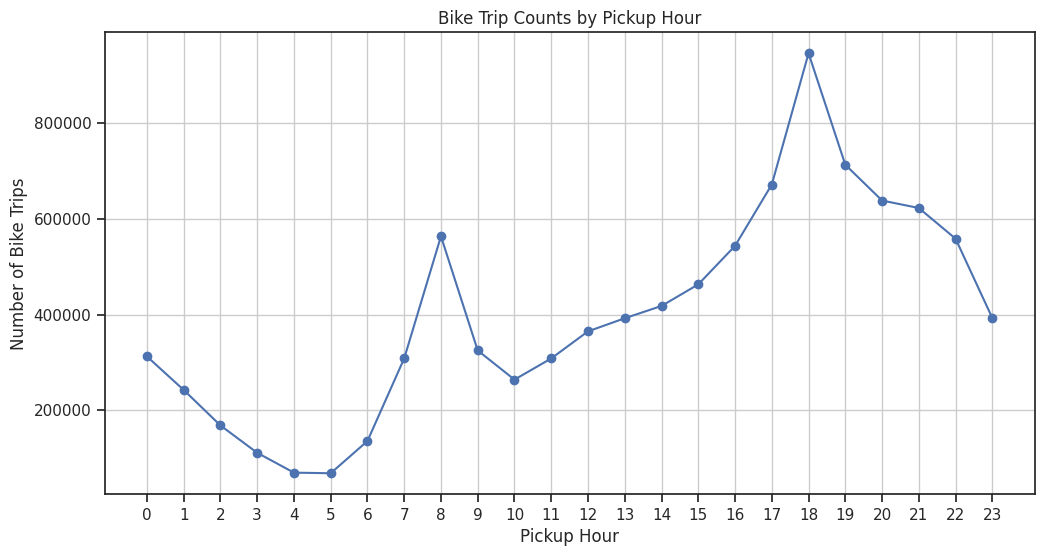

In [ ]:
#Line Plot of Trip Counts by Pickup Hour
plt.figure(figsize=(12, 6))
df['Phour'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Bike Trips')
plt.title('Bike Trip Counts by Pickup Hour')
plt.xticks(range(24))
plt.grid(True)
plt.show()

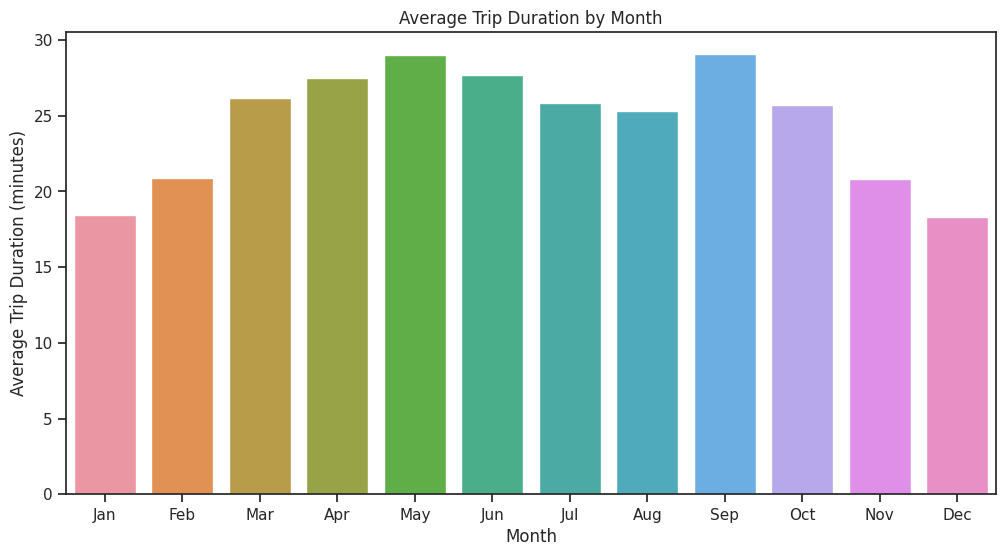

In [ ]:
# Calculate the average trip duration by month
avg_duration_by_month = df.groupby('Pmonth')['Duration'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_month.index, y=avg_duration_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
import folium
from folium import plugins
import pandas as pd

# Extract coordinates
locations_df = df[['PLatd', 'PLong']]  # Only latitude and longitude columns
grid_size = 1

# Create a base map centered around Seoul
seoul_map = folium.Map(location=[37.5665, 126.9780], zoom_start=12, tiles='CartoDB positron')
locations = [[lon, lat] for lat, lon in locations_df.values.tolist()]

# Calculate the grid cells
grid_cells = [(((lat - 37.5) * grid_size), ((lon - 126.8) * grid_size)) for lat, lon in locations]

grid_counts = {}
for cell in grid_cells:
    grid_counts[cell] = grid_counts.get(cell, 0) + 1

# Create a list of (latitude, longitude, density) for heatmap
heatmap_data = [(cell[0] / grid_size + 37.5 / grid_size, cell[1] / grid_size + 126.8 / grid_size, count) for cell, count in grid_counts.items()]
# Create a heatmap layer
heatmap_layer = plugins.HeatMap(heatmap_data,
                                min_opacity=0.2,
                                radius=15,
                                blur=20,
                                gradient={0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'red', 1.0: 'purple'}  # Define custom gradient colors
                                )

heatmap_layer.add_to(seoul_map)

# Display the map
seoul_map.save('seoul_simplified_heatmap.html')
seoul_map



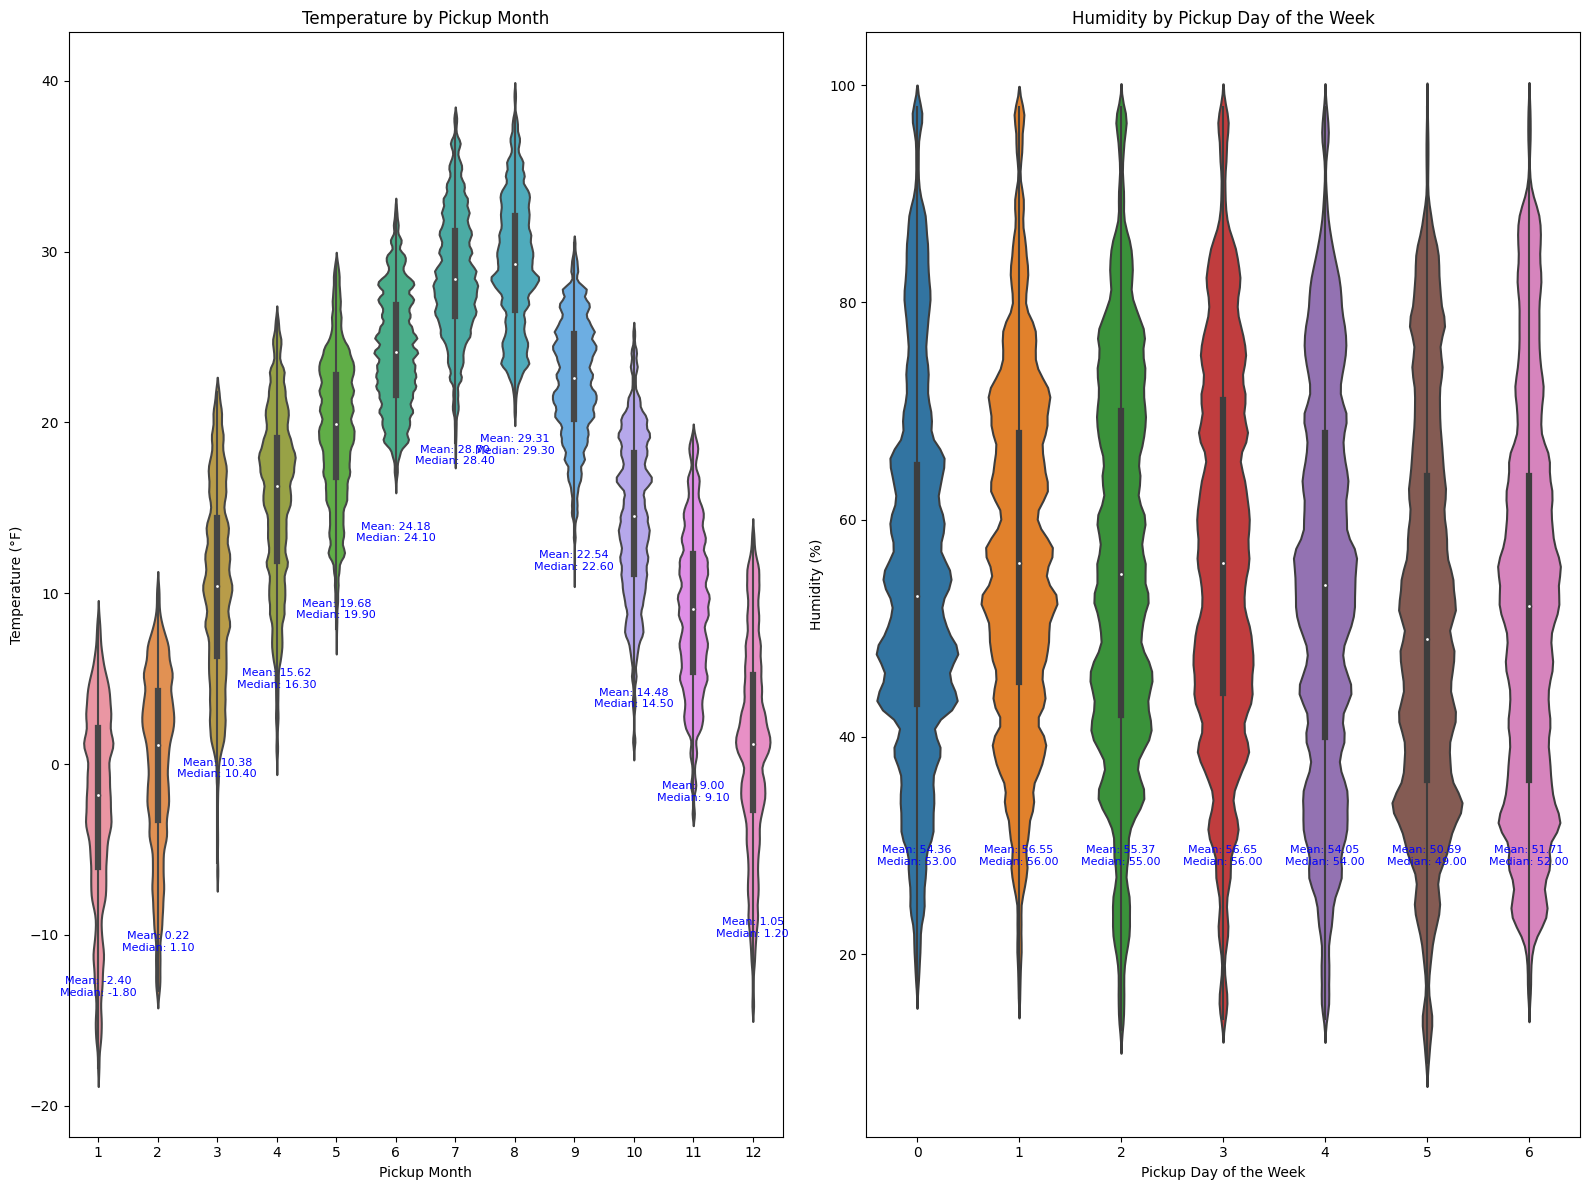

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))

# Violin plot of temperature by pickup month
sns.violinplot(data=df, x='Pmonth', y='Temp', ax=axes[0])
axes[0].set_xlabel('Pickup Month')
axes[0].set_ylabel('Temperature (°F)')
axes[0].set_title('Temperature by Pickup Month')


mean_temp_by_month = df.groupby('Pmonth')['Temp'].mean()
medians_temp_by_month = df.groupby('Pmonth')['Temp'].median()
for i, (mean, median) in enumerate(zip(mean_temp_by_month, medians_temp_by_month)):
    axes[0].text(i, mean-10, f'Mean: {mean:.2f}\nMedian: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

sns.violinplot(data=df, x='PDweek', y='Humid', ax=axes[1])
axes[1].set_xlabel('Pickup Day of the Week')
axes[1].set_ylabel('Humidity (%)')
axes[1].set_title('Humidity by Pickup Day of the Week')

mean_humidity_by_day = df.groupby('PDweek')['Humid'].mean()
medians_humidity_by_day = df.groupby('PDweek')['Humid'].median()
for i, (mean, median) in enumerate(zip(mean_humidity_by_day, medians_humidity_by_day)):
    axes[1].text(i, 30, f'Mean: {mean:.2f}\nMedian: {median:.2f}', ha='center', va='top', fontsize=8, color='b')

plt.tight_layout()

plt.show()

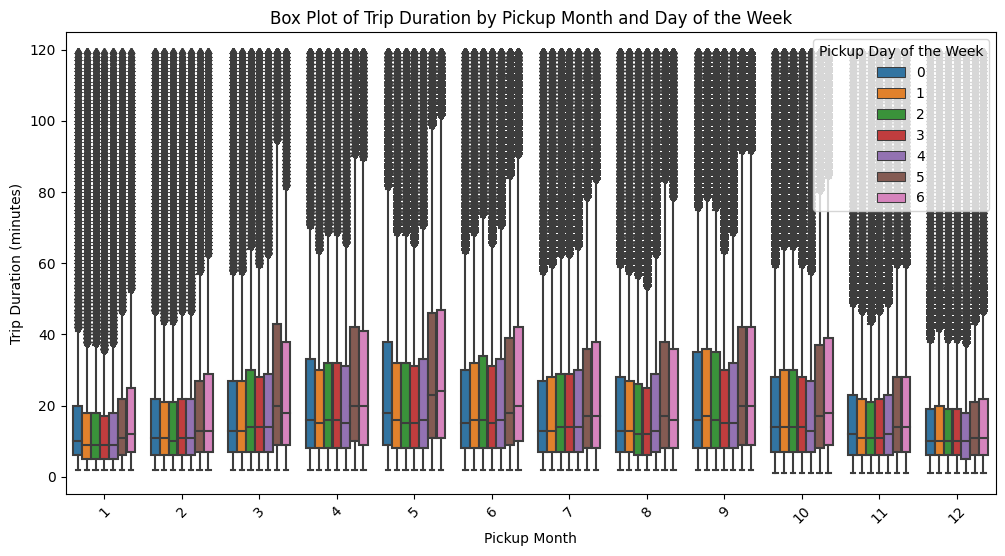

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pmonth', y='Duration', hue='PDweek')
plt.xlabel('Pickup Month')
plt.ylabel('Trip Duration (minutes)')
plt.title('Box Plot of Trip Duration by Pickup Month and Day of the Week')
plt.legend(title='Pickup Day of the Week', loc='upper right')
plt.xticks(rotation=45)
plt.show()

In [29]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8646056 entries, 1 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int8   
 1   Distance    int8   
 2   PLong       float32
 3   PLatd       float32
 4   DLong       float32
 5   DLatd       float64
 6   Haversine   float32
 7   Pmonth      int8   
 8   Pday        int8   
 9   Phour       int8   
 10  Pmin        int8   
 11  PDweek      int8   
 12  Dmonth      int8   
 13  Dday        int8   
 14  Dhour       int8   
 15  Dmin        int8   
 16  DDweek      int8   
 17  Temp        float32
 18  Precip      float32
 19  Wind        float32
 20  Humid       float64
 21  Solar       float32
 22  Snow        float32
 23  GroundTemp  float32
 24  Dust        float32
dtypes: float32(11), float64(2), int8(12)
memory usage: 659.6 MB


In [30]:
df = filtered_data[['Duration', 'Distance', 'Haversine', 'Temp', 'Phour']]


In [31]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [32]:

X_train,X_test, y_train, y_test = train_test_split(df.drop(columns=['Duration']), df['Duration'], test_size=0.25, random_state=43)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6484542, 4) (6484542,)
(2161514, 4) (2161514,)


In [33]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((6484542, 4), (2161514, 4))

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [35]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

model_dict = {
    'LinearRegression': {"model": LinearRegression(), "params": {}},
    'RidgeRegression': {"model": Ridge(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'LassoRegression': {"model": Lasso(), "params": {'alpha': [0.1, 1.0, 10.0]}},
    'ElasticNetRegression': {"model": ElasticNet(), "params": {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}}
}

In [40]:

def eval_models():
    model_results = pd.DataFrame()
    model_results['Train_RMSE'] = None
    model_results['Test_RMSE'] = None
    model_results['Train_MAE'] = None
    model_results['Test_MAE'] = None
    model_results['best_params'] = None

    best_reg_model_ours = None
    best_test_score = math.inf

    for model_name, reg_model in model_dict.items():
        classifier = GridSearchCV(reg_model['model'], reg_model['params'], n_jobs=20, verbose=0)
        classifier.fit(X_train_scaled, list(y_train))
        best_model = classifier.best_estimator_

        y_train_predicted = best_model.predict(X_train_scaled)
        train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
        train_mae = mean_absolute_error(list(y_train), y_train_predicted)

        print(model_name, train_rmse, classifier.best_params_)

        y_predicted = best_model.predict(X_test_scaled)
        test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
        test_mae = mean_absolute_error(list(y_test), y_predicted)

        if test_rmse < best_test_score:
            best_test_score = test_rmse
            best_reg_model_ours = best_model

        model_results.loc[model_name, ['Train_RMSE', 'Test_RMSE', 'Train_MAE', 'Test_MAE', 'best_params']] = [train_rmse, test_rmse, train_mae, test_mae, classifier.best_params_]

    print("Best model: ", best_model)
    print("Score Train: ",best_model.score(X_train_scaled,y_train))
    print("Score Test: ",best_model.score(X_test_scaled,y_test))
    # plot the prediction errors using the best model
    y_predicted = best_model.predict(X_test_scaled)
    plt.plot(list(y_test) - y_predicted, marker='o', linestyle='')

    return model_results

LinearRegression 18.86280303433272 {}
RidgeRegression 18.86280303393094 {'alpha': 10.0}
LassoRegression 18.863486025850012 {'alpha': 0.1}
ElasticNetRegression 18.864447533735927 {'alpha': 0.1, 'l1_ratio': 0.9}
Best model:  ElasticNet(alpha=0.1, l1_ratio=0.9)
Score Train:  0.31937704133279443
Score Test:  0.31962870536054355


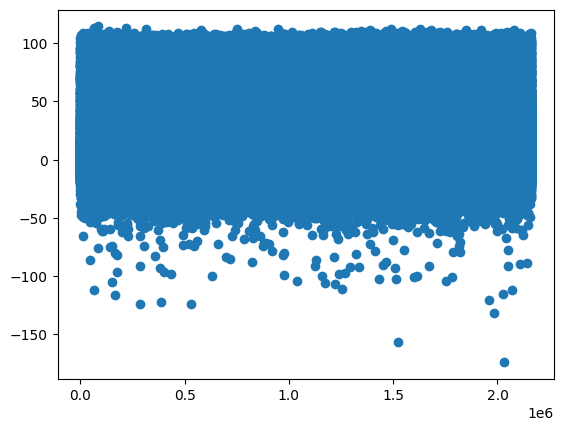

In [41]:
model_results = eval_models()

In [42]:
model_results

,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,best_params
LinearRegression,18.862803,18.852851,12.275897,12.275998,{}
RidgeRegression,18.862803,18.852851,12.275901,12.276002,{'alpha': 10.0}
LassoRegression,18.863486,18.853742,12.292553,12.292937,{'alpha': 0.1}
ElasticNetRegression,18.864448,18.85472,12.307475,12.307896,"{'alpha': 0.1, 'l1_ratio': 0.9}"
